# **PCA (PRINCIPAL COMPONENT ANALYSIS)**

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

### Dataset

In [3]:
# Dataset
cancer = load_breast_cancer()
# cancer

In [4]:
# features
df_cancer = pd.DataFrame(cancer['data'])

In [5]:
# menambahkan nama kolom
df_cancer.columns = cancer['feature_names'] 

In [6]:
# target
df_cancer['target'] = cancer['target']
df_cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [7]:
df_cancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


### Scaling

In [8]:
X = df_cancer.drop(columns='target')
y = df_cancer['target']

In [9]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)


### PCA

**With 30 Principal Component**

In [10]:
from sklearn.decomposition import PCA

In [12]:
# define PCA
pca = PCA(n_components=30)

# fit 
pca.fit(X_scaled)

# transform
X_pca = pca.transform(X_scaled)

In [13]:
# variance yang dimiliki oleh tiap Principal Component
pca.explained_variance_

array([1.33049908e+01, 5.70137460e+00, 2.82291016e+00, 1.98412752e+00,
       1.65163324e+00, 1.20948224e+00, 6.76408882e-01, 4.77456255e-01,
       4.17628782e-01, 3.51310875e-01, 2.94433153e-01, 2.61621161e-01,
       2.41782421e-01, 1.57286149e-01, 9.43006956e-02, 8.00034045e-02,
       5.95036135e-02, 5.27114222e-02, 4.95647002e-02, 3.12142606e-02,
       3.00256631e-02, 2.74877113e-02, 2.43836914e-02, 1.80867940e-02,
       1.55085271e-02, 8.19203712e-03, 6.91261258e-03, 1.59213600e-03,
       7.50121413e-04, 1.33279057e-04])

In [14]:
# variance yang dimiliki oleh tiap Principal Component dalam bentuk persentase
pca.explained_variance_ratio_

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

Text(0, 0.5, 'Variance (%)')

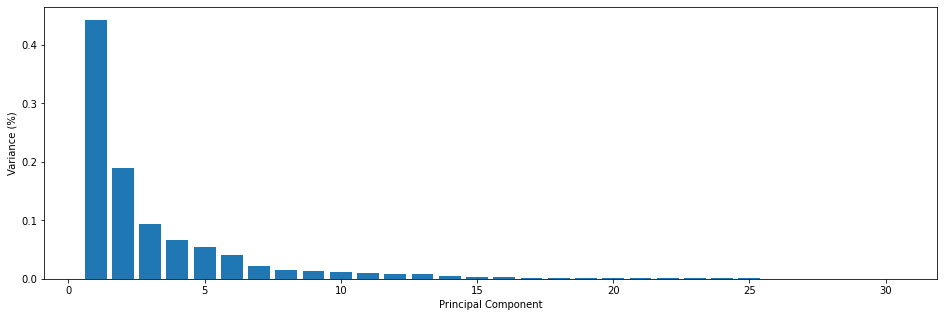

In [15]:
plt.figure(figsize=(16,5))
plt.bar(range(1,31), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Variance (%)')


In [16]:
pca.explained_variance_ratio_.cumsum()

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99557204,
       0.99657114, 0.99748579, 0.99829715, 0.99889898, 0.99941502,
       0.99968761, 0.99991763, 0.99997061, 0.99999557, 1.        ])

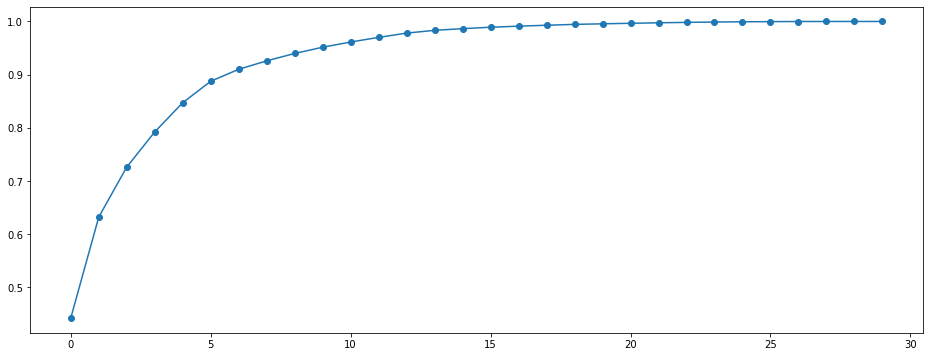

In [17]:
plt.figure(figsize=(16,6))
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.scatter(range(0,30), pca.explained_variance_ratio_.cumsum())


**With 2 Principal Component**

In [18]:
# define PCA
pca = PCA(n_components=2)

pca.fit(X_scaled)

X_pca_2 = pca.transform(X_scaled)
X_pca_2

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [19]:
pca.explained_variance_

array([13.30499079,  5.7013746 ])

In [20]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

In [21]:
pca.explained_variance_ratio_.sum()

0.6324320765155942

Ketika kita menggunakan 2 Principal Component, variance yang masih dapat terjaga sebesar 0.63 atau 63% dari seluruh informasi pada dataset awal.

In [22]:
print('Jumlah dimensi pada dataset awal: ', X_scaled.shape)
print('Jumlah dimensi dengan 2 PC: ', X_pca_2.shape)


Jumlah dimensi pada dataset awal:  (569, 30)
Jumlah dimensi dengan 2 PC:  (569, 2)


# **Tambahan**

In [47]:
pca = PCA(n_components=30)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

# number of components
n_pcs= pca.components_.shape[0]
n_pcs


30

### Visualization

Text(0, 0.5, 'Principal Component 2')

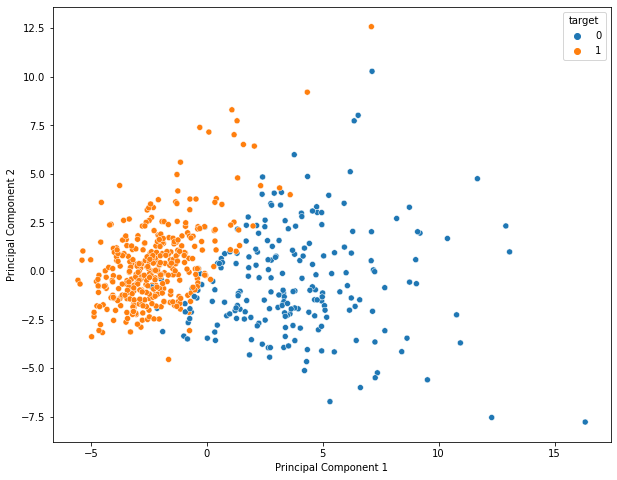

In [23]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=X_pca_2[:,0], y=X_pca_2[:,1], hue=y)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')


Kesimpulan:
- Informasi yang tersimpan dalam 2 Principal Component sebesar 63.24%
- Ketika kita mengurangi jumlah dimensi dari 30 menjadi 2, maka kita kehilangan 36.76% informasi. Tetapi dengan hanya 2 PC kita sudah dapat membedakan antara tumor yang Benign dan Malignant dengan cukup baik.
- Dengan menggunakan 2 PC, dapat kita visualisasikan dalam scatter plot.
- PCA dapat menangkap pola yang tersembunyi di dalam data.
- Malignant lebih terebar dari pada yang Benign

# **CLUSTERING: K-MEANS**

In [24]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [25]:
X, y = make_blobs(random_state=42)
X.shape

(100, 2)

<AxesSubplot:>

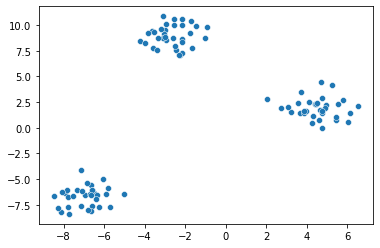

In [26]:
sns.scatterplot(x=X[:,0], y=X[:,1])

In [27]:
# define KMEANS
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [28]:
# label cluster
kmeans.labels_

array([0, 2, 1, 2, 0, 2, 1, 2, 2, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 2, 0, 0, 0, 0, 2, 2, 0, 1, 1, 1, 1, 2, 2, 0, 1, 2, 1,
       1, 2, 0, 0, 0, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 1, 0, 2, 0, 2, 0, 0,
       2, 0, 2, 2, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 1, 2, 1, 0, 1, 1, 1, 2,
       1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 0, 1], dtype=int32)

<AxesSubplot:>

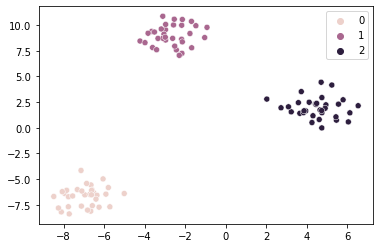

In [29]:
# hasil
sns.scatterplot(x=X[:,0], y=X[:,1], hue=kmeans.labels_)

### Dataset

In [30]:
df = pd.read_csv('ilustrasi k means.csv', sep=';')
df

,tinggibadan,tinggibadanistri
0,175,175
1,178,178
2,175,166
3,180,179
4,185,181
5,178,163
6,175,158
7,181,154
8,168,155
9,171,154


<AxesSubplot:xlabel='tinggibadan', ylabel='tinggibadanistri'>

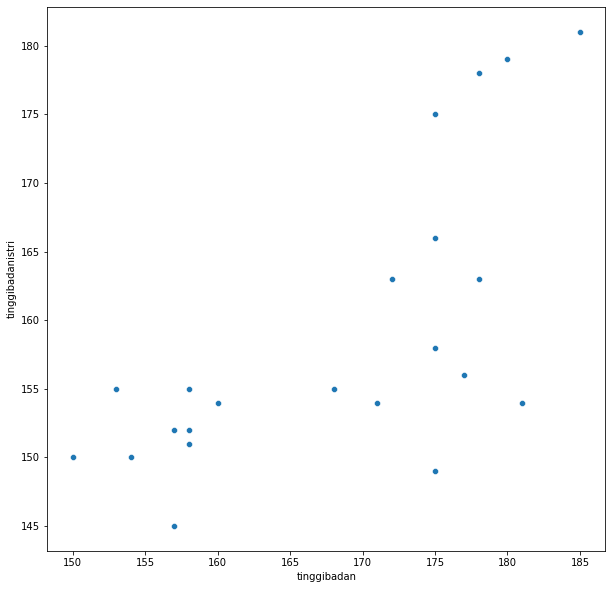

In [31]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df, x='tinggibadan', y='tinggibadanistri')

### Clustering K-MEANS

In [32]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

KMeans(n_clusters=3)

In [33]:
kmeans.inertia_

589.0833333333334

### Elbow Method

In [34]:
# Looping mencari jumlah K terbaik dari 2-9
kmeans_models = [KMeans(n_clusters=k).fit(df) for k in range(2,10)]
kmeans_models

[KMeans(n_clusters=2),
 KMeans(n_clusters=3),
 KMeans(n_clusters=4),
 KMeans(n_clusters=5),
 KMeans(n_clusters=6),
 KMeans(n_clusters=7),
 KMeans(),
 KMeans(n_clusters=9)]

In [35]:
kmeans_models[0].inertia_

1819.3333333333335

In [36]:
kmeans_models[1].inertia_

589.0833333333334

In [37]:
# Nilai inertia untuk tiap model Kmeans dengan nilai k yg berbeda
inertia = [model.inertia_ for model in kmeans_models]
inertia

[1819.3333333333335,
 589.0833333333334,
 401.69444444444446,
 324.8611111111111,
 251.25,
 210.16666666666669,
 158.26666666666665,
 127.26666666666668]

Text(0.5, 1.0, 'Elbow Method')

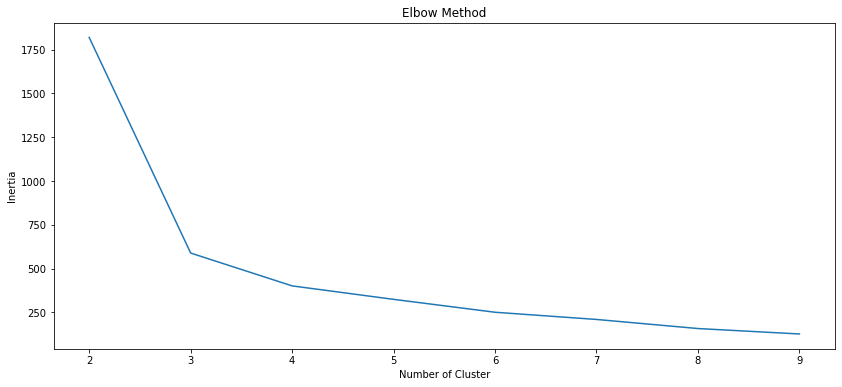

In [38]:
plt.figure(figsize=(14,6))

plt.plot((range(2,10)), inertia)

plt.xlabel('Number of Cluster')
plt.ylabel('Inertia')
plt.title('Elbow Method')

Berdasarkan Elbow Method, jumlah cluster terbaik untuk dataset ini adalah dengan menggunakan 3 cluster

### Silhouette Score

In [39]:
from sklearn.metrics import  silhouette_score

In [40]:
# Looping mencari jumlah K terbaik dari 2-9
kmeans_models = [KMeans(n_clusters=k).fit(df) for k in range(2,10)]
kmeans_models

[KMeans(n_clusters=2),
 KMeans(n_clusters=3),
 KMeans(n_clusters=4),
 KMeans(n_clusters=5),
 KMeans(n_clusters=6),
 KMeans(n_clusters=7),
 KMeans(),
 KMeans(n_clusters=9)]

In [41]:
# Looping silhoutte score
silhoutte = [silhouette_score(df, model.labels_) for model in kmeans_models]
silhoutte

[0.5080353833629737,
 0.6172319390416597,
 0.5469497456399819,
 0.5143325818253041,
 0.41956314779305154,
 0.4163119284259014,
 0.3734641381840636,
 0.36553758075709014]

Text(0.5, 1.0, 'Silhouette Score')

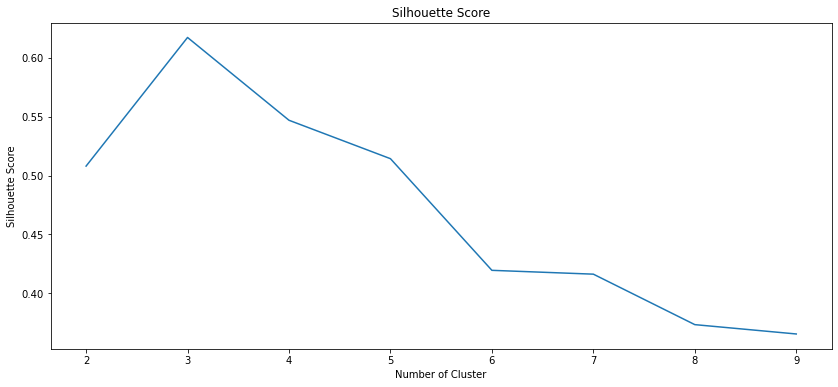

In [42]:
plt.figure(figsize=(14,6))

plt.plot((range(2,10)), silhoutte)

plt.xlabel('Number of Cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

Berdasarkan Silhouette Score, jumlah cluster terbaik untuk dataset ini adalah dengan menggunakan 3 cluster dengan score 0.61

### Final Result

In [43]:
# berdasarkan elbow method dan silhoutte score, jumlah cluster terbaik adalah 3
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

KMeans(n_clusters=3)

In [44]:
kmeans.labels_

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [45]:
df['cluster'] = kmeans.labels_
df

,tinggibadan,tinggibadanistri,cluster
0,175,175,1
1,178,178,1
2,175,166,0
3,180,179,1
4,185,181,1
5,178,163,0
6,175,158,0
7,181,154,0
8,168,155,0
9,171,154,0


Text(0, 0.5, 'Tinggi Badan Istri')

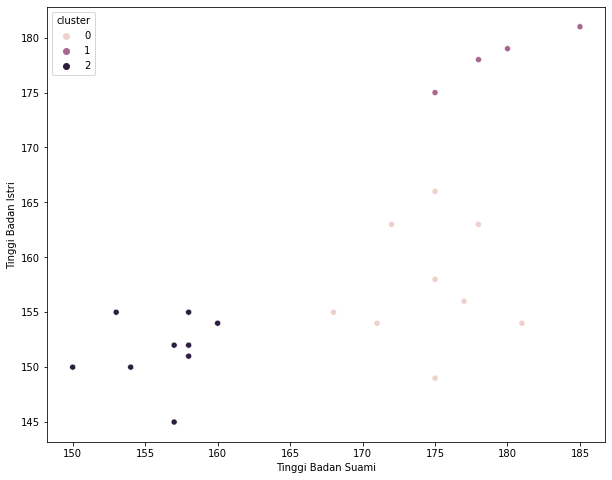

In [46]:
plt.figure(figsize=(10,8))

sns.scatterplot(
    data=df,
    x='tinggibadan', 
    y='tinggibadanistri',
    hue='cluster'
    )

plt.xlabel('Tinggi Badan Suami')
plt.ylabel('Tinggi Badan Istri')

Terbentuk 3 cluster

- Cluster 0: Suami tinggi, Istri pendek-sedang
- Cluster 1: Suami pendek, Istri pendek
- Cluster 2: Suami tinggi, Istri tinggi

In [48]:

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = cancer['feature_names']
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())
df

,0,1
0,PC1,mean concave points
1,PC2,mean fractal dimension
2,PC3,texture error
3,PC4,worst texture
4,PC5,mean smoothness
5,PC6,worst symmetry
6,PC7,worst fractal dimension
7,PC8,smoothness error
8,PC9,concavity error
9,PC10,mean symmetry
